# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Loading data and inspection

In [2]:
#load and inspect the data
df = 0

df = pd.read_csv('reg_data.csv')

df.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
df.describe()

,X,Y
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [4]:
assert df.shape == (100,2)

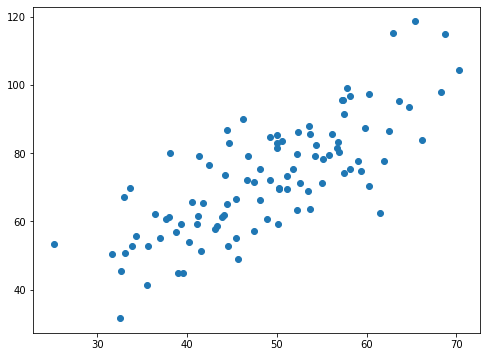

In [5]:
#plot the data (scatter)
plt.figure(figsize=(8, 6))
plt.scatter(df.X, df.Y)

#### Splitting the data

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.X.values, df.Y.values, test_size = 0.2, random_state = 0)

In [7]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

#### Defining and training the model

In [8]:
#implement a least squares function to find a, b

x_mean = 0
y_mean = 0
b_upper = 0
b_lower = 0
b = 0
a = 0

def least_squares(x, y):
    """
    Calculate and return the parameters a (intercept) and b (slope) of a linear regression model

    Input:
    dataset of X(first column) and Y(second column). Both floats

    Output:
    b and a as a tuple (dtype == float)

    """
    

    b = np.sum( (y - y.mean()) * (x - x.mean()) ) / np.sum( (x - x.mean())**2 )

    a = y.mean() - b*x.mean()

    return b, a

    
b, a = least_squares(x_train, y_train)

print(a)
print(b)

6.687439682550163
1.3450919020620422


In [9]:
# y_hat = x_train*b + a
# plt.figure(figsize=(8, 6))
# plt.scatter(x_train, y_train)
# plt.scatter(x_train, y_hat, c = 'r')



Trying with [matrix approach](https://www.ctspedia.org/do/view/CTSpedia/LinearRegression)  

$\beta = (X^TX)^{-1}X^TY$  
$\beta$ contains the linear model's parameters (coefficients)

In [10]:

X = np.concatenate([x_train.reshape(-1, 1), np.ones((x_train.shape[0], 1))], axis= 1 )
Y = y_train.reshape((-1, 1))

X_t_X_inverse = np.linalg.inv( X.T.dot(X) )
X_t_Y = X.T.dot(Y)
Beta = X_t_X_inverse.dot(X_t_Y)



# comparing with a and b from the least_squares function
print(b, a)
Beta



1.3450919020620422 6.687439682550163


array([[1.3450919 ],
       [6.68743968]])

In [11]:
assert abs(a - 6.68) <=0.03
assert abs(b - 1.34) <=0.03

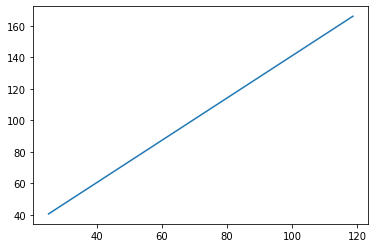

In [12]:
# line code
x = np.linspace(df.X.min(), df.Y.max(), 100)
line = b*x + a

plt.plot(x, line)

In [13]:
assert abs(a +3*b - 10.75) <= 0.09
assert abs(a +100*b - 140) <= 2

#### Evaluation

In [14]:

# Use the line function
# Classify your test data in to classes
# if the Y value for a certain X is lower than the line then the class is 0



class_0 = []
class_1 = []

for i in range(x_test.shape[0]):
    x_t = x_test[i]
    y_t = y_test[i]

    y_pred = b*x_t + a

    if y_t < y_pred:
        class_0.append([x_t, y_t])

    else:
        class_1.append([x_t, y_t])
# YOUR CODE HERE
# df['error'] = df.Y - y_hat

# df['class_'] = df['error'].apply(lambda x: 0 if x < 0 else 1)

        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


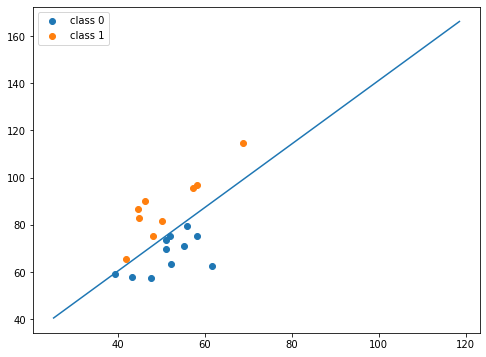

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], label = 'class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], label = 'class 1')
plt.plot(x, line)
plt.legend()

In [16]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

evaluation with coefficient of determination. 
 
$R^2 = 1 - \frac{\sum_{i = 1}^n(y{i} - \hat{y}{i})^2}{\sum_{i = 1}^n(y{i} - \bar{y})^2}$

In [30]:

def r_squared(x, y, slope, intercept):
    """
    computes and returns the coefficient of determination

    Input:
    x and y as array of floats

    Output:
    coefficient of determination (float)
    """
    numerator = 0
    denominator = 0
    for i in range(x.shape[0]):
        x_i = x[i]
        y_i = y[i]
        y_hat = slope*x_i + intercept


    numerator += (y_i - y_hat)**2
    denominator += (y_i - y.mean())**2
    return 1 - (numerator/denominator)




r_squared(x_train, y_train, b, a)

0.700090334327918